### Import packages and read data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Handle missing values

In [3]:
for i in df.columns:
    if df[i].isna().sum() !=0:
        print('Null values in', i, 'column:', df[i].isna().sum())

Null values in children column: 4
Null values in country column: 488
Null values in agent column: 16340
Null values in company column: 112593


In [4]:
#to see how many rows our dataset contains
len(df.index)

119390

In [5]:
#most rows do not contain company value -> the column will be dropped
df = df.drop(columns='company')

#total number of rows in comparison to the null values rows is not significant -> the null values will be dropped
df = df.dropna(subset=['children'])

#for country it will be assumed the missing values with the mode frequent values -> the null values will be filled with the most frequent variable
df.country.fillna(df['country'].mode()[0], inplace=True)

#for agent column will be filled with 9 for every null value.
df['agent'].fillna(0, inplace=True)

### Convert columns values

In [6]:
#replace TA/TO with undefined in distribution channel column
df['distribution_channel'].replace("TA/TO", "Undefined", inplace=True)

#replace Undefined,BB,FB,HB,SC to its meaning 
df['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'],
                  ['No Meal', 'Breakfast', 'Full Board', 'Hald Board', 'No Meal'],
                  inplace=True)

### Changing Datatypes

In [7]:
#to turn column into "int" datatype
df['children'].astype(int)
df['agent'].astype(int)

#to turn column into datetime data type
pd.to_datetime(df['reservation_status_date'])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

### Handle duplicates


In [8]:
#to know number of duplicates
print('Duplicate values are:', df.duplicated().sum())

#to drop the duplicated rows
df.drop_duplicates(inplace=True)

Duplicate values are: 32020


### Create new columns by combining other columns

In [9]:
#create total night column
df['total_night'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#convert month name to number then create new arrival date column by combining year, month, date
df['arrival_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month
df['arrival_date'] = pd.to_datetime(dict(year=df.arrival_date_year, month=df.arrival_month, day=df.arrival_date_day_of_month))

### Drop unnecessary columns

In [10]:
columns_to_drop = ['stays_in_weekend_nights', 'stays_in_week_nights', 'booking_changes', 'deposit_type', 'adr', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number']
df.drop(columns=columns_to_drop, inplace=True)

### Descriptive Analysis and Correlations

In [11]:
df.describe()

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_night,arrival_month
count,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.00000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000
mean,0.274935,79.915207,1.875936,0.138681,0.010828,0.039088,0.030424,0.184053,81.01464,0.749823,0.084255,0.698613,3.631275,6.475883
std,0.446484,86.056865,0.626475,0.455942,0.113616,0.193806,0.369208,1.732188,109.94285,10.017441,0.281577,0.831952,2.763594,3.097313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,2.000000,4.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,3.000000,7.000000
75%,1.000000,125.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.00000,0.000000,0.000000,1.000000,5.000000,9.000000
max,1.000000,737.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,535.00000,391.000000,8.000000,5.000000,69.000000,12.000000


/tmp/ipykernel_20/2696249081.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=5)


Text(0.03, 0.98, 'Correlation Between Variables')

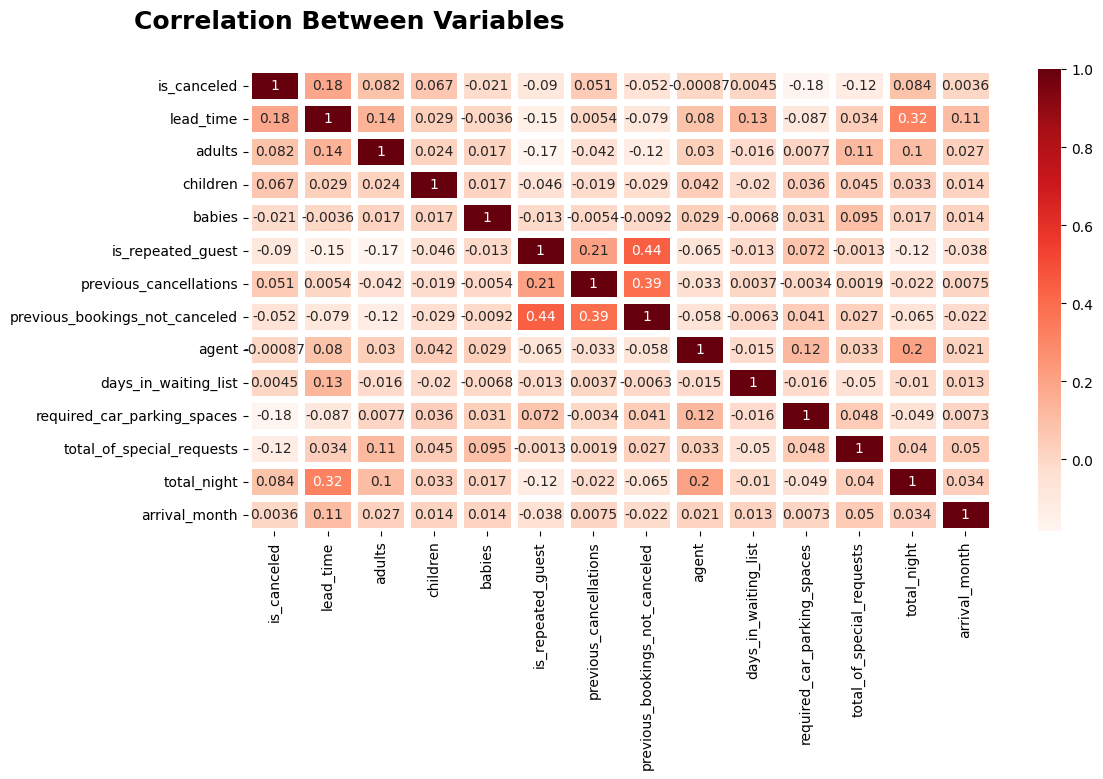

In [12]:
plt.rcParams['figure.figsize'] =(12, 6)
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha = "left", fontsize='18', 
             fontfamily='sans-serif', color= "black")

After data preparation process, we can export the file to csv, then import to Tableau or Microsoft Excel for data analysis and visualization

In [13]:
df.to_csv('result.csv', index=False)